# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 10.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 12.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 15.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.3 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [4]:
client = MongoClient(mongod_connect)
db = client.gp26 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [5]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [6]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [7]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#,locations = locations)   #Use either track or locations

1324370071872045061
1324370071871922178
1324370072035487744
1324370071997747200
1324370071951691781
1324370072022982656
1324370072035643394
1324370071960064001
1324370071901343745
1324370072073326598
1324370072157212672
1324370071960080384
1324370072157196289
1324370072085946368
1324370072136159232
1324370072220192770
1324370072228581378
1324370072199155714
1324370072287281153
1324370072320749569
1324370072467607553
1324370072501182472
1324370072404697089
1324370072434024448
1324370072396288000
1324370072517943299
1324370072576643072
1324370072610217987
1324370072568172545
1324370072618496006
1324370072580857856
1324370072069115905
1324370072585097220
1324370072777879552
1324370072660566016
1324370072836673537
1324370072765370369
1324370072786358272
1324370072744452096
1324370072715071489
1324370072853450752
1324370072899497985
1324370072954007552
1324370072849141760
1324370072807288834
1324370073021304835
1324370073084186625
1324370073100775426
1324370073159573504
1324370073092587521


1324370103069298690
1324370103086075905
1324370103211823106
1324370103232798722
1324370103207710722
1324370103287369729
1324370103169855490
1324370103270559748
1324370103115390977
1324370103346089992
1324370103325044736
1324370103413231616
1324370103438364677
1324370103396433922
1324370103589314560
1324370103505424385
1324370103706640384
1324370103534714880
1324370103698423808
1324370103690035203
1324370103870185479
1324370103845224455
1324370103828422657
1324370106609270785
1324370106684755975
1324370106739089408
1324370106550493185
1324370106575687683
1324370106617630728
1324370106818785281
1324370106743402497
1324370106743463936
1324370106923638785
1324370106907009024
1324370106441441288
1324370106923814912
1324370107108261890
1324370107167133699
1324370106911232004
1324370107074793474
1324370107011747841
1324370107016093703
1324370107246743553
1324370107053821956
1324370107292790784
1324370107171262465
1324370106961506306
1324370107242549251
1324370107385155590
1324370107326468098


1324370140088119296
1324370140121731073
1324370140083953664
1324370140188844033
1324370140138557445
1324370140289327106
1324370140058820610
1324370139802947593
1324370140239142915
1324370140130119680
1324370140302102529
1324370140209778689
1324370140314529792
1324370140302057472
1324370139194691584
1324370140423626752
1324370140281118721
1324370140453064705
1324370140486664196
1324370140541210624
1324370140432003074
1324370140360822787
1324370140616556544
1324370140469858306
1324370140511768576
1324370140528607234
1324370140775895041
1324370140675207169
1324370140767674368
1324370140763316225
1324370140801064961
1324370140767625218
1324370140914278405
1324370140876562432
1324370140977192960
1324370140985610242
1324370140914503681
1324370140973158403
1324370141094666242
1324370141015085056
1324370141090557958
1324370141128306692
1324370141140946946
1324370141308719105
1324370140968837121
1324370141379919872
1324370141325479948
1324370141342167041
1324370141354876929
1324370141455486980


1324370174393217024
1324370174414237699
1324370174527606789
1324370174477275136
1324370174489878530
1324370174179479553
1324370174552739848
1324370174628290564
1324370174489829376
1324370174640902146
1324370174477279232
1324370174569402370
1324370174783426566
1324370174728953856
1324370174611509249
1324370174804324352
1324370174686892033
1324370174842228736
1324370174280110086
1324370174871568385
1324370175039279106
1324370175039315971
1324370175131529218
1324370175009828869
1324370175274242048
1324370177883078658
1324370177790681090
1324370177878904841
1324370177799192579
1324370177753055238
1324370178029850625
1324370178017091584
1324370178080149513
1324370178138902529
1324370178126176258
1324370177983680512
1324370177996263426
1324370178067570688
1324370178042454016
1324370178130419712
1324370178067460096
1324370178344390656
1324370178159902721
1324370178185043974
1324370178088591361
1324370178327613445
1324370178361221124
1324370178361229315
1324370178554109953
1324370178235420682


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [9]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [10]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 05 15:21:10 +0000 2020'
'Thu Nov 05 15:21:07 +0000 2020'
'Thu Nov 05 15:19:05 +0000 2020'
'Thu Nov 05 15:18:57 +0000 2020'
'Thu Nov 05 15:18:47 +0000 2020'
'Thu Nov 05 15:18:31 +0000 2020'
'Thu Nov 05 15:18:20 +0000 2020'
'Thu Nov 05 15:17:51 +0000 2020'
'Thu Nov 05 15:17:44 +0000 2020'
'Thu Nov 05 15:17:35 +0000 2020'
'Thu Nov 05 15:17:27 +0000 2020'
'Thu Nov 05 15:16:40 +0000 2020'
'Thu Nov 05 15:16:11 +0000 2020'
'Thu Nov 05 15:15:59 +0000 2020'
'Thu Nov 05 15:15:21 +0000 2020'
'Thu Nov 05 15:15:20 +0000 2020'
'Thu Nov 05 15:15:12 +0000 2020'
'Thu Nov 05 15:15:00 +0000 2020'
'Thu Nov 05 15:14:12 +0000 2020'
'Thu Nov 05 15:14:04 +0000 2020'
'Thu Nov 05 15:13:52 +0000 2020'
'Thu Nov 05 15:13:52 +0000 2020'


Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 05 15:13:38 +0000 2020'
'Thu Nov 05 15:13:33 +0000 2020'
'Thu Nov 05 15:13:03 +0000 2020'
'Thu Nov 05 15:13:00 +0000 2020'
'Thu Nov 05 15:12:53 +0000 2020'
'Thu Nov 05 15:11:41 +0000 2020'
'Thu Nov 05 15:11:36 +0000 2020'
'Thu Nov 05 15:11:20 +0000 2020'
'Thu Nov 05 15:10:01 +0000 2020'
'Thu Nov 05 15:10:00 +0000 2020'
'Thu Nov 05 15:09:50 +0000 2020'
'Thu Nov 05 15:09:12 +0000 2020'
'Thu Nov 05 15:09:05 +0000 2020'
'Thu Nov 05 15:07:51 +0000 2020'
'Thu Nov 05 15:07:41 +0000 2020'
'Thu Nov 05 15:07:34 +0000 2020'
'Thu Nov 05 15:07:27 +0000 2020'
'Thu Nov 05 15:06:40 +0000 2020'
'Thu Nov 05 15:06:07 +0000 2020'
'Thu Nov 05 15:05:32 +0000 2020'
'Thu Nov 05 15:05:16 +0000 2020'
'Thu Nov 05 15:04:21 +0000 2020'
'Thu Nov 05 15:04:19 +0000 2020'
'Thu Nov 05 15:03:48 +0000 2020'
'Thu Nov 05 15:03:23 +0000 2020'
'Thu Nov 05 15:03:06 +0000 2020'
'Thu Nov 05 15:02:56 +0000 2020'
'Thu Nov 05 15:02:22 +0000 2020'
'Thu Nov 05 15:02:17 +0000 2020'
'Thu Nov 05 15:01:55 +0000 2020'
'Thu Nov 0

'Thu Nov 05 13:42:28 +0000 2020'
'Thu Nov 05 13:42:21 +0000 2020'
'Thu Nov 05 13:42:18 +0000 2020'
'Thu Nov 05 13:42:07 +0000 2020'
'Thu Nov 05 13:42:01 +0000 2020'
'Thu Nov 05 13:42:01 +0000 2020'
'Thu Nov 05 13:41:55 +0000 2020'
'Thu Nov 05 13:41:53 +0000 2020'
'Thu Nov 05 13:41:50 +0000 2020'
'Thu Nov 05 13:41:36 +0000 2020'
'Thu Nov 05 13:41:26 +0000 2020'
'Thu Nov 05 13:41:26 +0000 2020'
'Thu Nov 05 13:41:16 +0000 2020'
'Thu Nov 05 13:41:11 +0000 2020'
'Thu Nov 05 13:41:09 +0000 2020'
'Thu Nov 05 13:41:07 +0000 2020'
'Thu Nov 05 13:40:53 +0000 2020'
'Thu Nov 05 13:40:50 +0000 2020'
'Thu Nov 05 13:40:49 +0000 2020'
'Thu Nov 05 13:40:45 +0000 2020'
'Thu Nov 05 13:40:41 +0000 2020'
'Thu Nov 05 13:40:24 +0000 2020'
'Thu Nov 05 13:40:21 +0000 2020'
'Thu Nov 05 13:40:08 +0000 2020'
'Thu Nov 05 13:40:00 +0000 2020'
'Thu Nov 05 13:39:56 +0000 2020'
'Thu Nov 05 13:39:55 +0000 2020'
'Thu Nov 05 13:39:54 +0000 2020'
'Thu Nov 05 13:39:52 +0000 2020'
'Thu Nov 05 13:39:46 +0000 2020'
'Thu Nov 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [12]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

2072
2002


Create a text index and print the Tweets containing specific keywords. 

In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [14]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [15]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: ✝️🇺🇸LoveWell🎶⭐🇺🇸#HoldTheLine🇺🇸#VoteForTRUMP
text: RT @EmeraldRobinson: No you can't stop counting the votes in Pennsylvania and go home.

No you can't stop counting the votes in Nevada and…
----
name: Elmer Zapata-Mercado
text: The states' have their own laws on which votes count and which doesn't. All votes being counted currently are 100%… https://t.co/ZaLljRMhP1
----
name: Melo B. Times
text: RT @Ike_Saul: Reminder: the votes being counted in PA right now did not "come in" after the election. Those votes are all sorted separately…
----
name: ΓΗΞ (aggressively) Δƞτι-Γʀυʍρ Δƞτι Fᴀ𝖼ɪ𝐬Ƭ
text: Especially people who voted by mail, and early voting. Really making all the difference in this election. https://t.co/XuCEFv4IYg
----
name: Marcus Morris
text: @taynoway @HKrassenstein @realDonaldTrump Military overseas votes are counted after election day. Are you saying soldoers votes dont count?
----
name: 🇺🇸RED AS WALZ FACE SHE SAID🇺🇸
text: RT @wdunlap: @realDonaldTrump Why is it we

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [17]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,metadata,possibly_sensitive,display_text_range,extended_entities
0,5fa4176bccebd6928e91804f,Thu Nov 05 15:16:54 +0000 2020,1324370111160029189,1324370111160029189,RT @EmeraldRobinson: No you can't stop countin...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1604589414764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa41767ccebd6928e917f8f,Thu Nov 05 15:16:50 +0000 2020,1324370094512869378,1324370094512869378,The states' have their own laws on which votes...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,1604589410795,1.324368e+18,1324368202139357186,{'created_at': 'Thu Nov 05 15:09:19 +0000 2020...,"{'url': 'https://t.co/eRjzGUnBp3', 'expanded':...",{'full_text': 'The states' have their own laws...,NaN,NaN,NaN,NaN
2,5fa4176cccebd6928e91805b,Thu Nov 05 15:16:54 +0000 2020,1324370111394914314,1324370111394914314,RT @Ike_Saul: Reminder: the votes being counte...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1604589414820,1.324368e+18,1324368202139357186,{'created_at': 'Thu Nov 05 15:09:19 +0000 2020...,"{'url': 'https://t.co/mCyKwfb3UC', 'expanded':...",NaN,NaN,NaN,NaN,NaN
3,5fa4199cccebd6928e918625,Thu Nov 05 13:43:15 +0000 2020,1324346541730127874,1324346541730127874,"Especially people who voted by mail, and early...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,NaN,1.324346e+18,1324345927750987776,{'created_at': 'Thu Nov 05 13:40:48 +0000 2020...,NaN,NaN,"{'iso_language_code': 'en', 'result_type': 're...",False,NaN,NaN
4,5fa41783ccebd6928e9184e0,Thu Nov 05 15:17:17 +0000 2020,1324370207977041920,1324370207977041920,@taynoway @HKrassenstein @realDonaldTrump Mili...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.324370e+18,1324369937478148098,327231686.0,...,1604589437847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[42, 139]",NaN
5,5fa4177bccebd6928e918365,Thu Nov 05 15:17:10 +0000 2020,1324370177753055238,1324370177753055238,RT @wdunlap: @realDonaldTrump Why is it we nev...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604589430641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa41773ccebd6928e9181c7,Thu Nov 05 15:17:01 +0000 2020,1324370141090557958,1324370141090557958,RT @wdunlap: @realDonaldTrump Why is it we nev...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604589421900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa4176dccebd6928e9180be,Thu Nov 05 15:16:56 +0000 2020,1324370119619973121,1324370119619973121,RT @wdunlap: @realDonaldTrump Why is it we nev...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1604589416781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa41769ccebd6928e917ff1,Thu Nov 05 15:16:52 +0000 2020,1324370102934999041,1324370102934999041,RT @wdunlap: @realDonaldTrump Why is it we nev...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604589412803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa41768ccebd6928e917fa3,Thu Nov 05 15:16:50 +0000 2020,1324370095062327298,1324370095062327298,RT @wdunlap: @realDonaldTrump Why is it we nev...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604589410926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


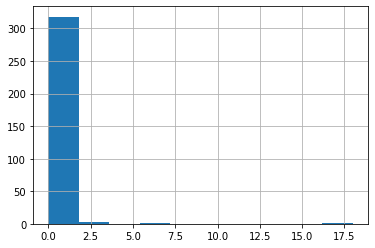

In [18]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count